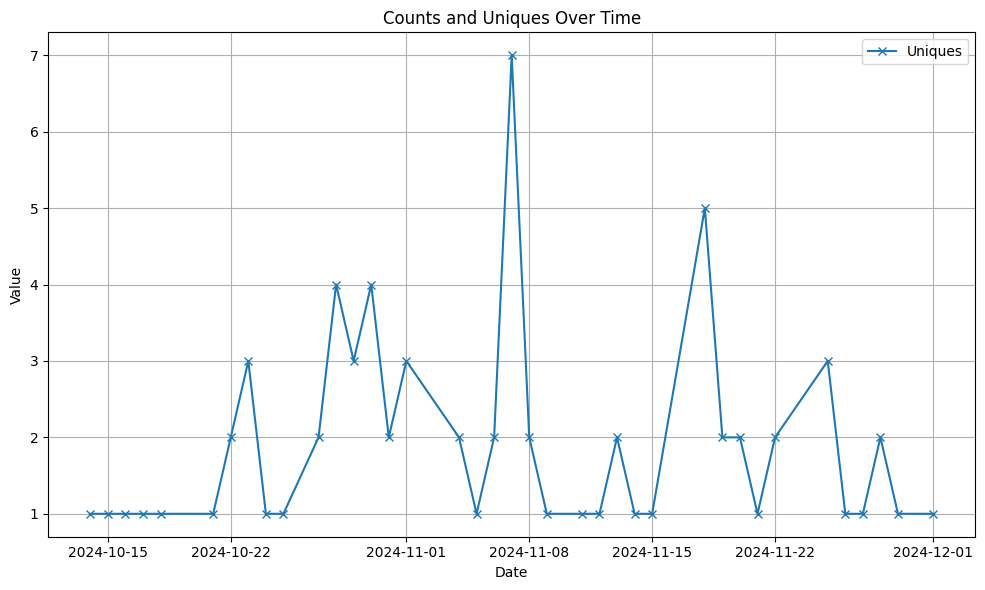

In [7]:
import os
import json
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Directory containing the JSON files
directory = "./"

# Dictionary to store the most recent data for each date
latest_data = {}

# Loop through all files in the directory
for filename in sorted(os.listdir(directory)):
    if filename.startswith("views_summary_") and filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            for daily_entry in data['daily_breakdown']:
                date = daily_entry['date']
                count = daily_entry['count']
                uniques = daily_entry['uniques']
                # Update with more recent data if necessary
                if date not in latest_data or latest_data[date]['file'] < filename:
                    latest_data[date] = {
                        'count': count,
                        'uniques': uniques,
                        'file': filename
                    }

# Extract the consolidated data
all_dates = []
all_counts = []
all_uniques = []

for date, values in latest_data.items():
    all_dates.append(date)
    all_counts.append(values['count'])
    all_uniques.append(values['uniques'])

# Convert data into a DataFrame for easier handling
df = pd.DataFrame({
    "date": [datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ") for date in all_dates],
    "count": all_counts,
    "uniques": all_uniques
})

# Sort by date to ensure the plot is in chronological order
df = df.sort_values("date")

# Plot the data
plt.figure(figsize=(10, 6))
# plt.plot(df["date"], df["count"], label="Count", marker='o')
plt.plot(df["date"], df["uniques"], label="Uniques", marker='x')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Counts and Uniques Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
